In [291]:
import pandas as pd

In [292]:
df = pd.read_excel(r'picotin_dec_march.xlsx')
cost_asia_square = pd.read_excel(r'CostSheet.xlsx', sheet_name='AsiaSquare')
cost_katong = pd.read_excel(r'CostSheet.xlsx', sheet_name='Katong')
cost_rochester = pd.read_excel(r'CostSheet.xlsx', sheet_name='Rochester')

def process_outlet_data(df):
    # Convert 'Month' column to categorical
    df['Month'] = pd.Categorical(df['Month'], categories=['Jan', 'Feb', 'Mar'], ordered=True)
    
    # Convert other columns to float and fill missing values with the column average
    for col in df.columns:
        if col != 'Month':  # Skip the 'Month' column
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure numeric conversion
            df[col].fillna(df[col].mean(), inplace=True)  # Fill missing values with average
    return df

# Process each outlet
cost_asia_square = process_outlet_data(cost_asia_square)
cost_katong = process_outlet_data(cost_katong)
cost_rochester = process_outlet_data(cost_rochester)

cost_asia_square.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_6820\221553522.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill missing values with average


Month                      category
Draught Beer                float64
Bottle Beer                   int64
Craft Beer                    int64
Coffee beans                  int64
Liquor                      float64
Soft Drinks                 float64
Wine purchases              float64
Meat                        float64
Vegetables                  float64
Sea food                      int64
Sauce                       float64
Others                      float64
Salary_Admin                  int64
CPF/FWL Admin Staffs        float64
Salary_Floor                  int64
Overtime_Floor              float64
Casual Labour_Floor         float64
CPF Employer_Floor            int64
CPF - FWL_Floor               int64
Salary_Kitchen                int64
Overtime_Kitchen              int64
Casual Labour_Kitchen         int64
CPF Employer_Kitchen          int64
CPF - FWL_Kitchen             int64
Medical Exp                   int64
Staff meal_Outside            int64
Uniform and Accessories     

In [293]:
columns_to_drop = ['date_only', 'Date', 'date_y']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

df.rename(columns={'date_x': 'date','Dinner Lunch Sales': 'Dinner Sales'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], errors='raise')
df = df[(df['date'] >= '2025-01-01') & (df['date'] <= '2025-03-31')]

In [294]:
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        continue
    elif df[col].dtype == 'object':
        continue
    elif df[col].dtype == 'category':
        continue
    else:
        df[col] = pd.to_numeric(df[col], errors='raise')
        df[col].fillna(df[col].mean(), inplace=True)

df['Day'] = pd.Categorical(df['Day'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6820\4075711950.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [295]:
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())
print(df.shape)
print("Number of rows with missing values:", df[missing_columns].isnull().any(axis=1).sum())
df.dropna(inplace=True)
print(df.shape)
df.dtypes

Columns with missing values: ['Outlet', 'Day', 'Last Bill Closed', 'Closing Time', 'Closing Manager Name']
(242, 31)
Number of rows with missing values: 14
(228, 31)


date                                 datetime64[ns]
total_food                                  float64
total_drinks                                float64
live craft beer                             float64
total                                       float64
orders count                                float64
avg order                                   float64
Outlet                                       object
Day                                        category
Breakfast Sales                             float64
Lunch Sales                                 float64
Evening Sales                               float64
Dinner Sales                                float64
Night Sales                                 float64
Total Sales                                 float64
Number of Breakfast Floor Staff             float64
Number of Lunch Floor Staff                 float64
Number of Evening Floor Staff               float64
Number of Dinner Floor Staff                float64
Number of Ni

In [296]:
print(df.head())
pd.set_option('display.max_columns', None)
df.dtypes

         date  total_food  total_drinks  live craft beer   total  \
32 2025-01-01       710.8        3427.0            200.0  4231.6   
33 2025-01-02       457.0         656.0            213.0  1150.0   
34 2025-01-03       325.0         785.0            211.0  1135.0   
35 2025-01-04       835.0        2106.0            605.0  3030.0   
36 2025-01-05       937.0        1951.0            774.0  3056.0   

    orders count  avg order  Outlet  Day  Breakfast Sales  Lunch Sales  \
32          15.0      81.48  Katong  Wed             0.00         0.00   
33          25.0      51.22  Katong  Thu             0.00         0.00   
34          30.0      76.70  Katong  Fri           940.02         0.00   
35          49.0      74.89  Katong  Sat          1132.73       420.84   
36          28.0      60.79  Katong  Sun             0.00        58.75   

    Evening Sales  Dinner Sales  Night Sales  Total Sales  \
32          64.75       1047.14       110.31      1222.20   
33         302.17       

date                                 datetime64[ns]
total_food                                  float64
total_drinks                                float64
live craft beer                             float64
total                                       float64
orders count                                float64
avg order                                   float64
Outlet                                       object
Day                                        category
Breakfast Sales                             float64
Lunch Sales                                 float64
Evening Sales                               float64
Dinner Sales                                float64
Night Sales                                 float64
Total Sales                                 float64
Number of Breakfast Floor Staff             float64
Number of Lunch Floor Staff                 float64
Number of Evening Floor Staff               float64
Number of Dinner Floor Staff                float64
Number of Ni

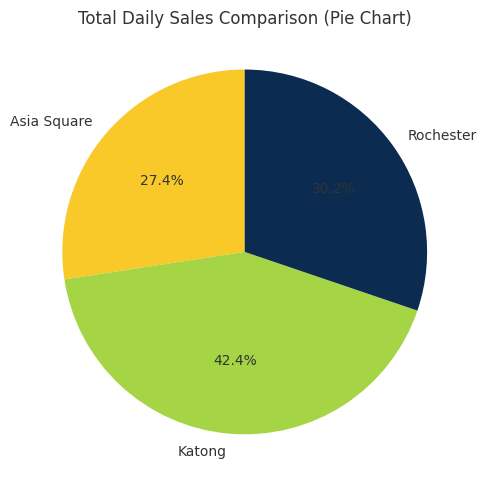

C:\Users\User\AppData\Local\Temp\ipykernel_6820\3470851711.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_outlet.values, y=total_sales_by_outlet.index, palette=colors, ax=ax)


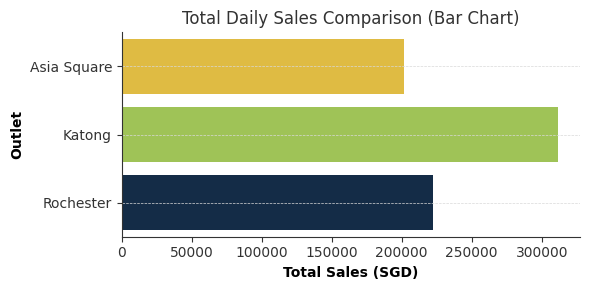

In [297]:
# Cell 1: Total Daily Sales Comparison (Pie and Bar)
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.labelweight': 'bold',
    'axes.edgecolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'text.color': '#333333',
})

# Total sales by outlet
total_sales_by_outlet = df.groupby('Outlet')['Total Sales'].sum().reindex(['Asia Square', 'Katong', 'Rochester'])
outlet_colors = {
    'Asia Square': '#F9C929',
    'Katong': '#A5D545',
    'Rochester': '#0B2B50'
}
colors = [outlet_colors[o] for o in total_sales_by_outlet.index]

# Pie Chart
fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')
ax.pie(total_sales_by_outlet, labels=total_sales_by_outlet.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')
plt.title('Total Daily Sales Comparison (Pie Chart)')
plt.tight_layout()
plt.show()

# Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(6, 3), facecolor='white')
sns.barplot(x=total_sales_by_outlet.values, y=total_sales_by_outlet.index, palette=colors, ax=ax)
ax.set_xlabel('Total Sales (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.title('Total Daily Sales Comparison (Bar Chart)')
plt.tight_layout()
plt.show()


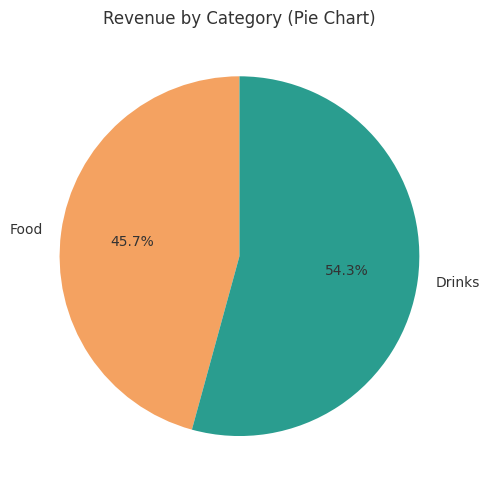

C:\Users\User\AppData\Local\Temp\ipykernel_6820\18072157.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_totals.values, y=category_totals.index, palette=colors, ax=ax)


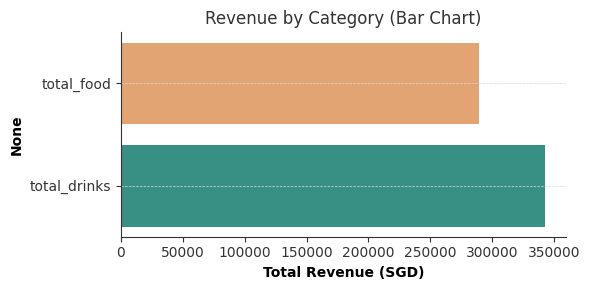

In [298]:
# Cell 2: Revenue by Category (Food vs Drinks)
category_totals = df[['total_food', 'total_drinks']].sum()
colors = ['#F4A261', '#2A9D8F']  # Custom colors for category contrast

# Pie Chart
fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')
ax.pie(category_totals, labels=['Food', 'Drinks'], autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')
plt.title('Revenue by Category (Pie Chart)')
plt.tight_layout()
plt.show()

# Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(6, 3), facecolor='white')
sns.barplot(x=category_totals.values, y=category_totals.index, palette=colors, ax=ax)
ax.set_xlabel('Total Revenue (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.title('Revenue by Category (Bar Chart)')
plt.tight_layout()
plt.show()


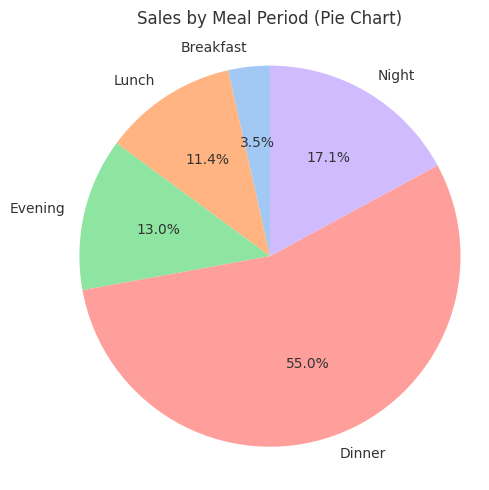

C:\Users\User\AppData\Local\Temp\ipykernel_6820\3109811483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_totals.values, y=meal_totals.index.str.replace(' Sales', ''), palette=colors, ax=ax)


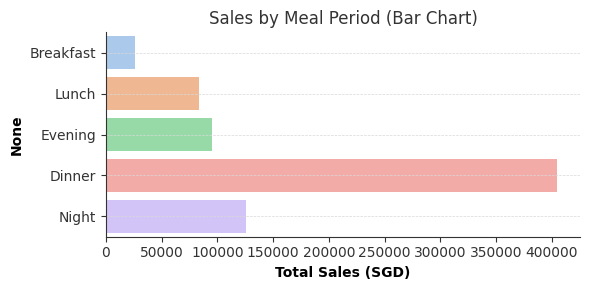

In [299]:
# Cell 3: Sales by Meal Period (Pie + Horizontal Bar)
meal_periods = ['Breakfast Sales', 'Lunch Sales', 'Evening Sales', 'Dinner Sales', 'Night Sales']
meal_totals = df[meal_periods].sum()

colors = sns.color_palette('pastel', len(meal_totals))

# Pie Chart
fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')
ax.pie(meal_totals, labels=meal_totals.index.str.replace(' Sales', ''), autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')
plt.title('Sales by Meal Period (Pie Chart)')
plt.tight_layout()
plt.show()

# Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(6, 3), facecolor='white')
sns.barplot(x=meal_totals.values, y=meal_totals.index.str.replace(' Sales', ''), palette=colors, ax=ax)
ax.set_xlabel('Total Sales (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.title('Sales by Meal Period (Bar Chart)')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\3465311962.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_aov = df.groupby(['Outlet', 'Month'])['avg order'].mean().reset_index()


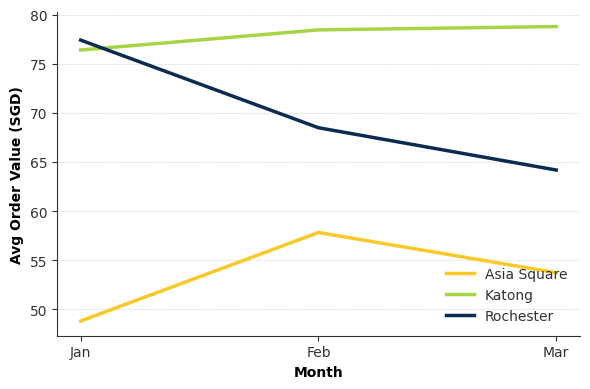

In [300]:
# Cell 4: AOV by Outlet – Monthly Line Plot
df['Month'] = pd.Categorical(df['date'].dt.strftime('%b'), categories=['Jan', 'Feb', 'Mar'], ordered=True)

monthly_aov = df.groupby(['Outlet', 'Month'])['avg order'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.lineplot(data=monthly_aov, x='Month', y='avg order', hue='Outlet', palette=outlet_colors, linewidth=2.5, ax=ax)

ax.set_ylabel('Avg Order Value (SGD)')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


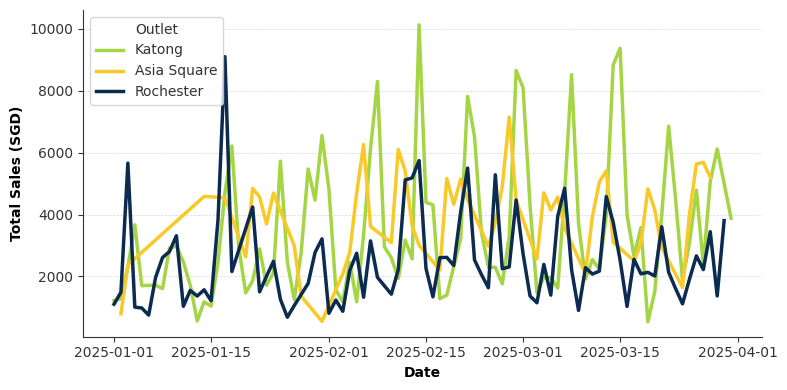

In [301]:
# Cell 5: Daily Sales by Outlet – Time Series
fig, ax = plt.subplots(figsize=(8, 4), facecolor='white')
sns.lineplot(data=df, x='date', y='Total Sales', hue='Outlet', palette=outlet_colors, linewidth=2.5, ax=ax)

ax.set_ylabel('Total Sales (SGD)')
ax.set_xlabel('Date')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


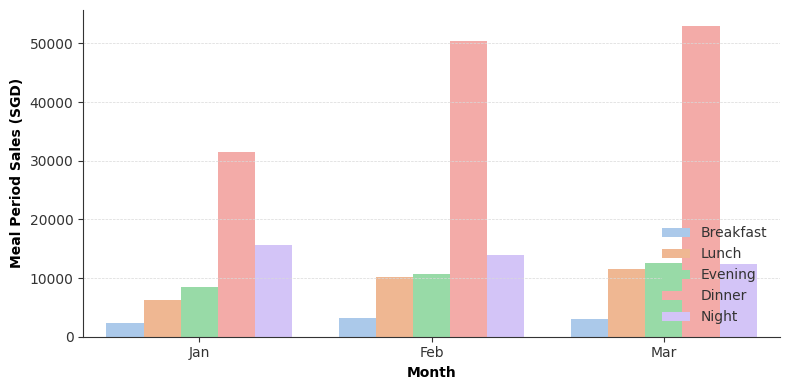

In [302]:
# Cell 6: Stacked Bar – Meal Period Sales by Outlet (Fixed)
meal_sales_cols = ['Breakfast Sales', 'Lunch Sales', 'Evening Sales', 'Dinner Sales', 'Night Sales']
df['Month'] = pd.Categorical(df['date'].dt.strftime('%b'), categories=['Jan', 'Feb', 'Mar'], ordered=True)

# Fix: add observed=True to remove groupby warning
stacked_data = df.groupby(['Outlet', 'Month'], observed=True)[meal_sales_cols].sum().reset_index()

# Reshape for proper stacking
melted = stacked_data.melt(id_vars=['Outlet', 'Month'], var_name='Meal Period', value_name='Sales')
melted['Meal Period'] = melted['Meal Period'].str.replace(' Sales', '')

fig, ax = plt.subplots(figsize=(8, 4), facecolor='white')
sns.barplot(
    data=melted,
    x='Month', y='Sales', hue='Meal Period', errorbar=None,
    ax=ax, palette='pastel'
)

ax.set_ylabel('Meal Period Sales (SGD)')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\549077549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outlet', y='avg order', palette=outlet_colors, ax=ax)


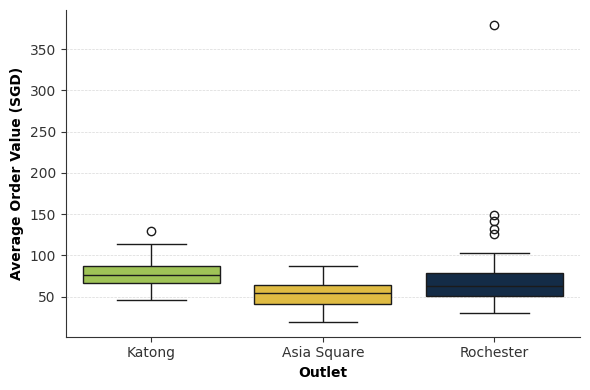

In [303]:
# Cell 7: AOV Boxplot by Outlet
fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.boxplot(data=df, x='Outlet', y='avg order', palette=outlet_colors, ax=ax)

ax.set_ylabel('Average Order Value (SGD)')
ax.set_xlabel('Outlet')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\3934682277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_composition.values, y=revenue_composition.index, palette=colors, ax=ax)


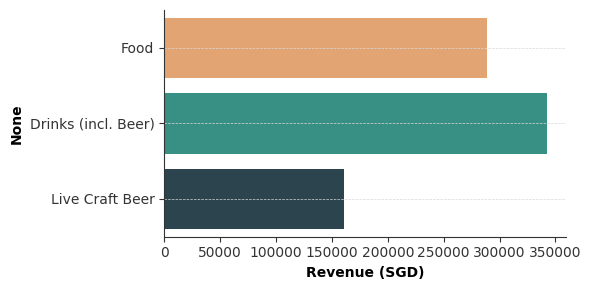

In [304]:
# Cell 8: Revenue Composition – Bar
revenue_composition = df[['total_food', 'total_drinks', 'live craft beer']].sum()
revenue_composition.index = ['Food', 'Drinks (incl. Beer)', 'Live Craft Beer']
colors = ['#F4A261', '#2A9D8F', '#264653']  # Adjust as needed

fig, ax = plt.subplots(figsize=(6, 3), facecolor='white')
sns.barplot(x=revenue_composition.values, y=revenue_composition.index, palette=colors, ax=ax)

ax.set_xlabel('Revenue (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\1720473136.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Outlet', 'Day'])['Total Sales'].mean().unstack().reindex(index=['Asia Square', 'Katong', 'Rochester'])


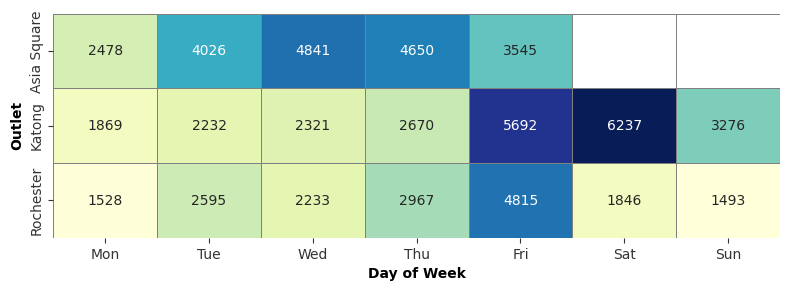

In [305]:
# Cell 9: Heatmap – Avg Sales by Day of Week vs Outlet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Day is ordered from Monday to Sunday
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

# Pivot table of average sales
heatmap_data = df.groupby(['Outlet', 'Day'])['Total Sales'].mean().unstack().reindex(index=['Asia Square', 'Katong', 'Rochester'])

fig, ax = plt.subplots(figsize=(8, 3), facecolor='white')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5, linecolor='gray', cbar=False, ax=ax)

ax.set_xlabel('Day of Week')
ax.set_ylabel('Outlet')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\1829926738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zero_days_pct.values, y=zero_days_pct.index, palette=[outlet_colors[o] for o in zero_days_pct.index], ax=ax)


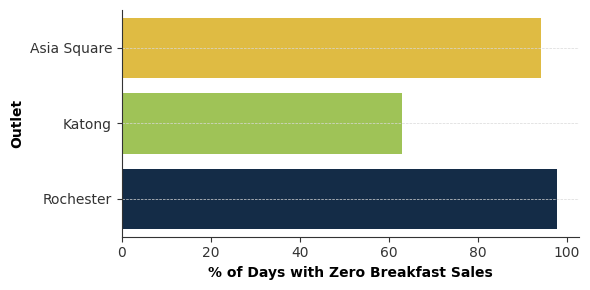

In [306]:
# Cell 10: Bar – Zero-Sale Breakfast Days % by Outlet
zero_days_pct = (
    df.groupby('Outlet')['Breakfast Sales']
    .apply(lambda x: (x == 0).sum() / len(x) * 100)
    .reindex(['Asia Square', 'Katong', 'Rochester'])
)

fig, ax = plt.subplots(figsize=(6, 3), facecolor='white')
sns.barplot(x=zero_days_pct.values, y=zero_days_pct.index, palette=[outlet_colors[o] for o in zero_days_pct.index], ax=ax)

ax.set_xlabel('% of Days with Zero Breakfast Sales')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


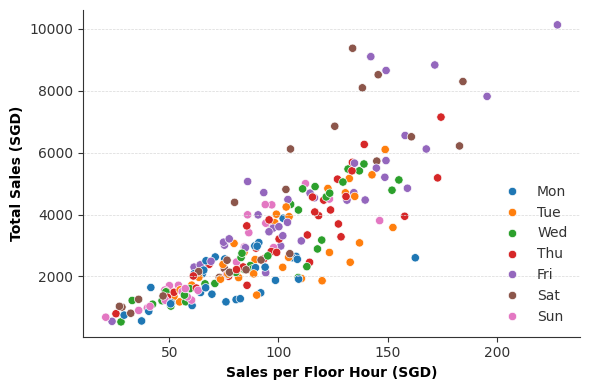

In [307]:
# Cell 11: Scatter – Sales per Floor Hour vs Total Sales
df['Sales per Floor Hour'] = df['Total Sales'] / df['Total Floor Staff Hours']

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.scatterplot(data=df, x='Sales per Floor Hour', y='Total Sales', hue='Day', palette='tab10', ax=ax)

ax.set_xlabel('Sales per Floor Hour (SGD)')
ax.set_ylabel('Total Sales (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


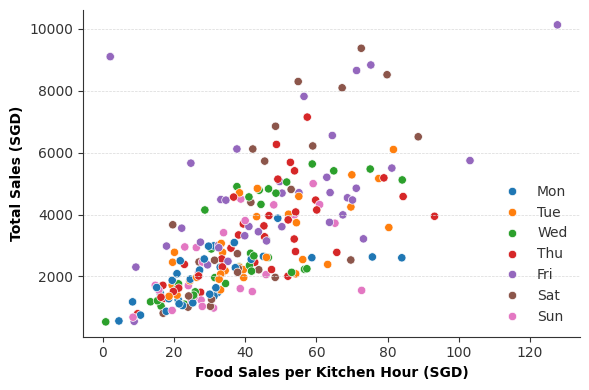

In [308]:
# Cell 12: Scatter – Food Sales per Kitchen Hour vs Total Sales
df['Sales per Kitchen Hour'] = df['total_food'] / df['Total Kitchen Staff Hours']

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.scatterplot(data=df, x='Sales per Kitchen Hour', y='Total Sales', hue='Day', palette='tab10', ax=ax)

ax.set_xlabel('Food Sales per Kitchen Hour (SGD)')
ax.set_ylabel('Total Sales (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


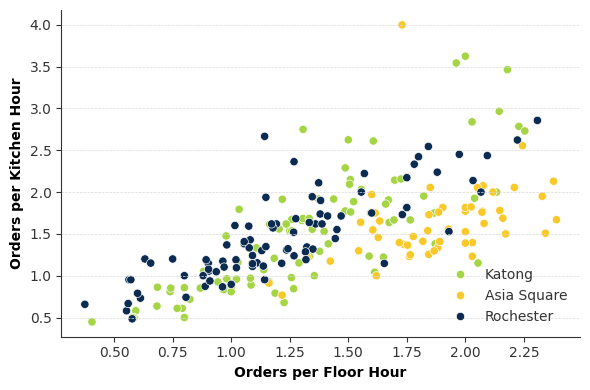

In [309]:
# Cell 13: Scatter – Orders per Staff Hour
df['Orders per Floor Hour'] = df['orders count'] / df['Total Floor Staff Hours']
df['Orders per Kitchen Hour'] = df['orders count'] / df['Total Kitchen Staff Hours']

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.scatterplot(data=df, x='Orders per Floor Hour', y='Orders per Kitchen Hour', hue='Outlet', palette=outlet_colors, ax=ax)

ax.set_xlabel('Orders per Floor Hour')
ax.set_ylabel('Orders per Kitchen Hour')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\1122181769.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eff_df, x='Slot', y='Efficiency', palette='pastel', ax=ax)


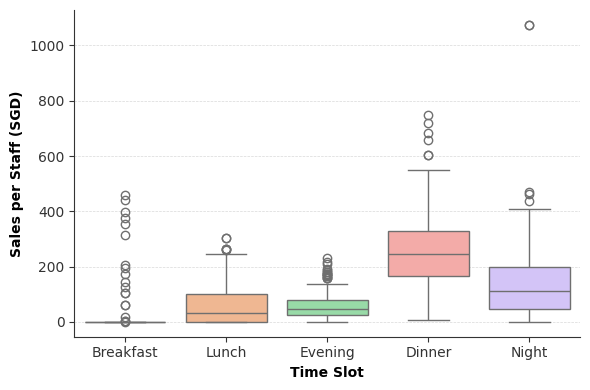

In [310]:
# Cell 14: Boxplot – Staff Efficiency by Time Slot
slots = ['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Night']

efficiency_data = []
for slot in slots:
    sales_col = f'{slot} Sales'
    floor_col = f'Number of {slot} Floor Staff'
    kitchen_col = f'Number of {slot} Kitchen Staff'
    if sales_col in df and floor_col in df and kitchen_col in df:
        eff = df[sales_col] / (df[floor_col] + df[kitchen_col])
        temp_df = pd.DataFrame({'Slot': slot, 'Efficiency': eff})
        efficiency_data.append(temp_df.reset_index(drop=True))  # Reset index before appending

eff_df = pd.concat(efficiency_data, ignore_index=True)  # Concatenate and reset index

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.boxplot(data=eff_df, x='Slot', y='Efficiency', palette='pastel', ax=ax)

ax.set_xlabel('Time Slot')
ax.set_ylabel('Sales per Staff (SGD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [311]:
# Cell 16: Tagging Cost Components as Fixed or Variable & Merging
import pandas as pd

# Add 'Outlet' label and combine all
cost_asia_square['Outlet'] = 'Asia Square'
cost_katong['Outlet'] = 'Katong'
cost_rochester['Outlet'] = 'Rochester'

cost_all = pd.concat([cost_asia_square, cost_katong, cost_rochester], ignore_index=True)

# Set Month as categorical
cost_all['Month'] = pd.Categorical(cost_all['Month'], categories=['Jan', 'Feb', 'Mar'], ordered=True)

# Tagging cost types
fixed_costs = ['Salary_Admin', 'CPF/FWL Admin Staffs', 'Salary_Floor', 'Salary_Kitchen']
variable_costs = [col for col in cost_all.columns if col not in fixed_costs + ['Month', 'Outlet']]

cost_melted = cost_all.melt(id_vars=['Month', 'Outlet'], var_name='Category', value_name='Amount')
cost_melted['Cost Type'] = cost_melted['Category'].apply(lambda x: 'Fixed' if x in fixed_costs else 'Variable')


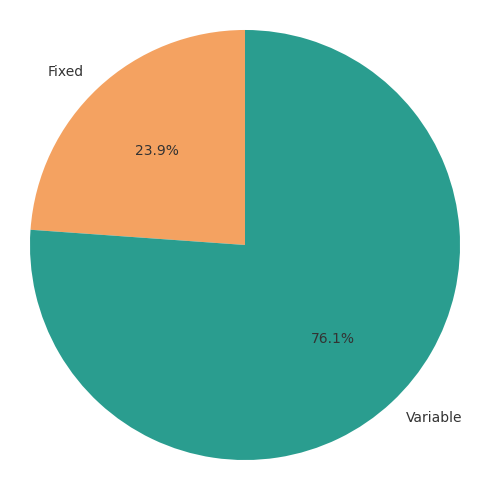

In [312]:
# Cell 17: Pie – Fixed vs Variable Cost Share (across all outlets)
cost_summary = cost_melted.groupby('Cost Type')['Amount'].sum()

fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')
ax.pie(cost_summary, labels=cost_summary.index, autopct='%1.1f%%', colors=['#F4A261', '#2A9D8F'], startangle=90)
ax.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\2821635218.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Outlet', 'Month'])['Total Sales'].sum().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_6820\2821635218.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Outlet', 'Month'])['Amount'].sum().reset_index()


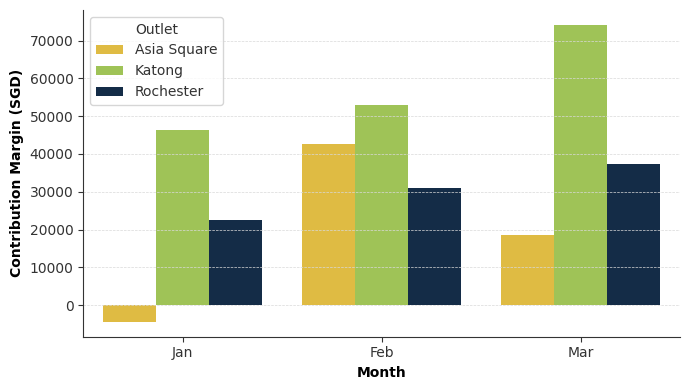

In [313]:
# Cell 18: Bar – CM by Outlet
# Get total monthly sales from daily data
df['Month'] = pd.Categorical(df['date'].dt.strftime('%b'), categories=['Jan', 'Feb', 'Mar'], ordered=True)
monthly_sales = df.groupby(['Outlet', 'Month'])['Total Sales'].sum().reset_index()

# Total variable cost per outlet/month
variable_costs_total = (
    cost_melted[cost_melted['Cost Type'] == 'Variable']
    .groupby(['Outlet', 'Month'])['Amount'].sum().reset_index()
    .rename(columns={'Amount': 'Variable Cost'})
)

# Merge and compute CM
cm_df = pd.merge(monthly_sales, variable_costs_total, on=['Outlet', 'Month'])
cm_df['CM'] = cm_df['Total Sales'] - cm_df['Variable Cost']

fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
sns.barplot(data=cm_df, x='Month', y='CM', hue='Outlet', palette=outlet_colors, ax=ax)

ax.set_ylabel('Contribution Margin (SGD)')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


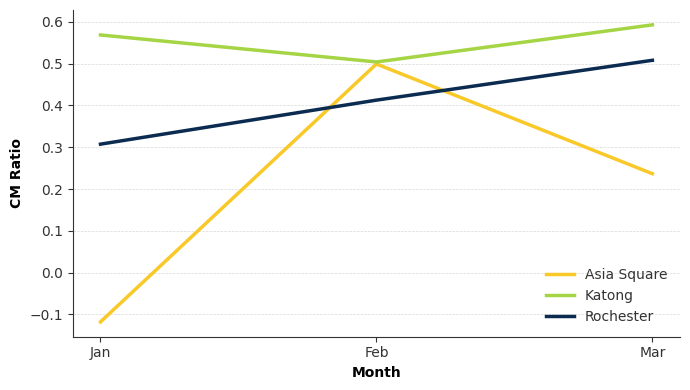

In [314]:
# Cell 19: Line – CM Ratio by Outlet
cm_df['CM Ratio'] = cm_df['CM'] / cm_df['Total Sales']

fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
sns.lineplot(data=cm_df, x='Month', y='CM Ratio', hue='Outlet', palette=outlet_colors, linewidth=2.5, ax=ax)

ax.set_ylabel('CM Ratio')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


In [315]:
# Cell 20: Aggregate Craft Beer Revenue and Costs
# Aggregate daily craft beer revenue
df['Month'] = pd.Categorical(df['date'].dt.strftime('%b'), categories=['Jan', 'Feb', 'Mar'], ordered=True)
craft_revenue = df.groupby(['Outlet', 'Month'])['live craft beer'].sum().reset_index().rename(columns={'live craft beer': 'Craft Revenue'})

# Craft beer cost from cost sheet
craft_cost = cost_all[['Outlet', 'Month', 'Craft Beer']].rename(columns={'Craft Beer': 'Craft Cost'})

# Merge both
craft_gp = pd.merge(craft_revenue, craft_cost, on=['Outlet', 'Month'])
craft_gp['Craft GP'] = craft_gp['Craft Revenue'] - craft_gp['Craft Cost']
craft_gp['GP Margin'] = craft_gp['Craft GP'] / craft_gp['Craft Revenue']


C:\Users\User\AppData\Local\Temp\ipykernel_6820\2516033751.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  craft_revenue = df.groupby(['Outlet', 'Month'])['live craft beer'].sum().reset_index().rename(columns={'live craft beer': 'Craft Revenue'})


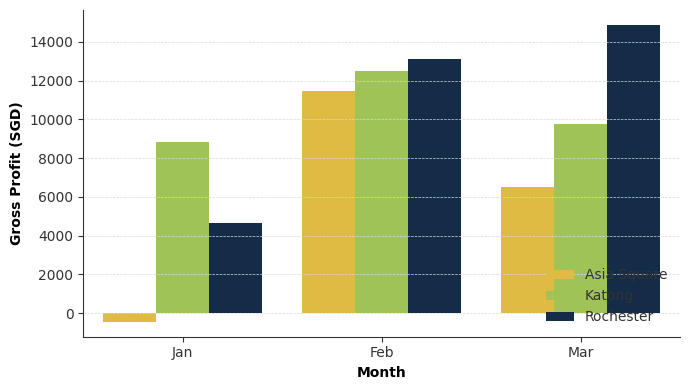

In [316]:
# Cell 21: Bar – Craft Beer Gross Profit by Outlet/Month
fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
sns.barplot(data=craft_gp, x='Month', y='Craft GP', hue='Outlet', palette=outlet_colors, ax=ax)

ax.set_ylabel('Gross Profit (SGD)')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


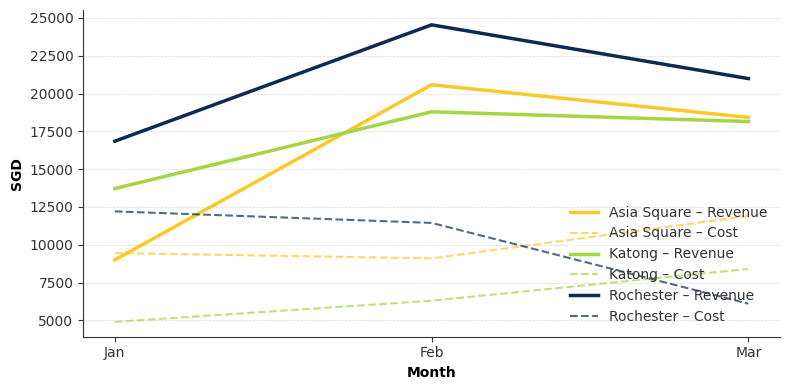

In [317]:
# Cell 22: Line – Craft Beer Revenue vs Cost per Outlet
fig, ax = plt.subplots(figsize=(8, 4), facecolor='white')

for outlet in ['Asia Square', 'Katong', 'Rochester']:
    data = craft_gp[craft_gp['Outlet'] == outlet]
    ax.plot(data['Month'], data['Craft Revenue'], label=f'{outlet} – Revenue', color=outlet_colors[outlet], linewidth=2.5)
    ax.plot(data['Month'], data['Craft Cost'], linestyle='--', label=f'{outlet} – Cost', color=outlet_colors[outlet], alpha=0.7)

ax.set_ylabel('SGD')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\1707272439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_outlet = df.groupby(['Outlet', 'Month'])['Total Sales'].sum().reset_index()


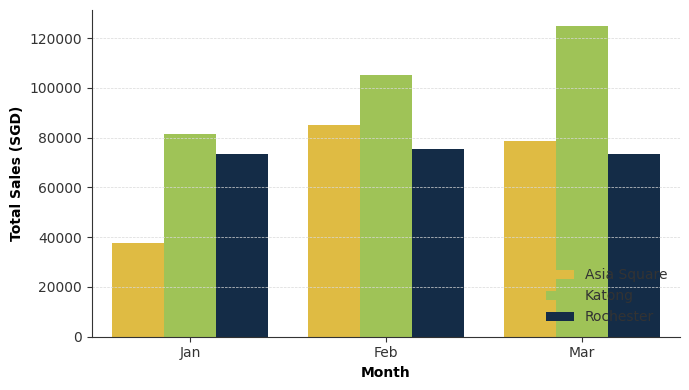

In [318]:
# Cell 23: Monthly Total Sales by Outlet
monthly_sales_outlet = df.groupby(['Outlet', 'Month'])['Total Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
sns.barplot(data=monthly_sales_outlet, x='Month', y='Total Sales', hue='Outlet', palette=outlet_colors, ax=ax)

ax.set_ylabel('Total Sales (SGD)')
ax.set_xlabel('Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


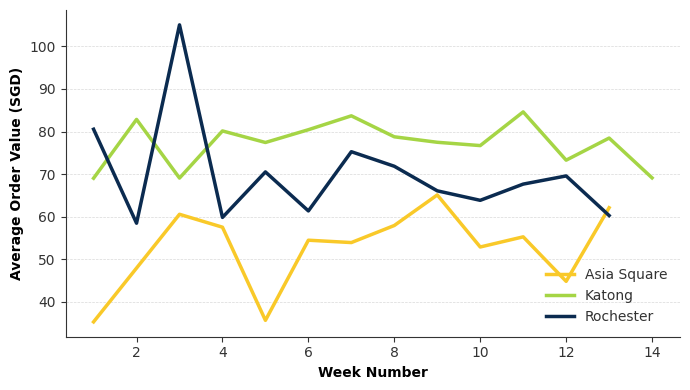

In [319]:
# Cell 24: Weekly AOV by Outlet
df['Week'] = df['date'].dt.isocalendar().week
weekly_aov = df.groupby(['Outlet', 'Week'])['avg order'].mean().reset_index()

fig, ax = plt.subplots(figsize=(7, 4), facecolor='white')
sns.lineplot(data=weekly_aov, x='Week', y='avg order', hue='Outlet', palette=outlet_colors, linewidth=2.5, ax=ax)

ax.set_ylabel('Average Order Value (SGD)')
ax.set_xlabel('Week Number')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6820\447359582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outlet', y='Sales per Total Staff Hour', palette=outlet_colors, ax=ax)


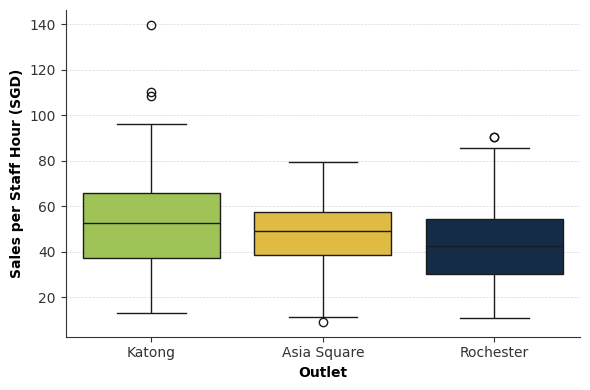

In [320]:
# Cell 25: Boxplot – Sales per Total Staff Hour by Outlet
df['Sales per Total Staff Hour'] = df['Total Sales'] / (df['Total Floor Staff Hours'] + df['Total Kitchen Staff Hours'])

fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')
sns.boxplot(data=df, x='Outlet', y='Sales per Total Staff Hour', palette=outlet_colors, ax=ax)

ax.set_ylabel('Sales per Staff Hour (SGD)')
ax.set_xlabel('Outlet')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


,% Zero Breakfast Days
Outlet,
Asia Square,94.230769
Katong,62.921348
Rochester,97.701149


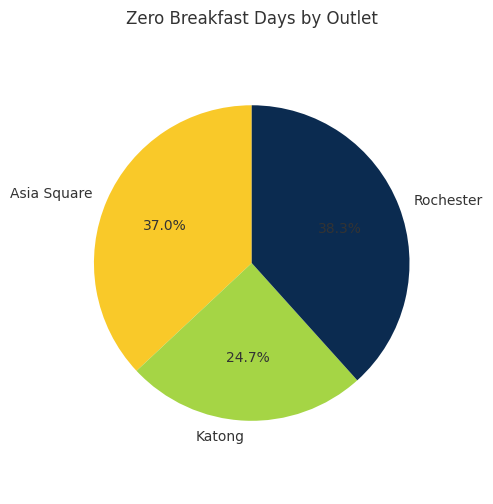

In [322]:
# Cell 26: Table + Pie – Zero Breakfast Days
zero_breakfast_summary = (
    df.groupby('Outlet')['Breakfast Sales']
    .apply(lambda x: (x == 0).sum() / len(x) * 100)
    .reindex(['Asia Square', 'Katong', 'Rochester'])
    .rename('% Zero Breakfast Days')
)

# Table
display(zero_breakfast_summary.to_frame())

# Pie
fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')
ax.pie(zero_breakfast_summary, labels=zero_breakfast_summary.index, autopct='%1.1f%%',
       colors=[outlet_colors[o] for o in zero_breakfast_summary.index], startangle=90)
ax.axis('equal')
plt.tight_layout()
plt.title('Zero Breakfast Days by Outlet')
plt.show()
